Isaura Arias - Project 3

- **Dataset(s) to be used:** [https://dataminer2.pjm.com/feed/load_frcstd_hist]; [https://dataminer2.pjm.com/feed/hrl_load_metered]
- **Analysis question:** [Looking at PJM hourly electricity load data from December 1, 2022 to December 31, 2022, what is the difference between PJM energy demand forecasts and actual recorded energy demand data (recorded as hourly load metered data)?]
- **Columns that will (likely) be used:**
  - [Dataset 1] [Date Range]
  - [Dataset 1, 2][Forecast Area ("energy zone")]
  - [Dataset 1] [Projected MW demand]
  - [Dataset 2] [Actual MW demand]
  - [Difference]

- **Hypothesis**: [There will be significant differences between projected energy usage and actual energy usage. I project that the actual energy usage will be less than the projected energy demand.]
- **Site URL:** [https://project-3-new.readthedocs.io/en/latest/index.html#]

In [25]:
import pandas as pd

I begin by importing the data and understanding the data set (reading the columns and initial rows)

In [26]:
forecast_projections = pd.read_csv("/content/load_frcstd_hist.csv")
actual_meter_data = pd.read_csv("/content/hrl_load_metered.csv")

In [27]:
forecast_projections.columns

Index(['evaluated_at_utc', 'evaluated_at_ept', 'forecast_hour_beginning_utc',
       'forecast_hour_beginning_ept', 'forecast_area', 'forecast_load_mw'],
      dtype='object')

In [28]:
forecast_projections.head()

,evaluated_at_utc,evaluated_at_ept,forecast_hour_beginning_utc,forecast_hour_beginning_ept,forecast_area,forecast_load_mw
0,11/30/2022 10:45:00 AM,11/30/2022 5:45:00 AM,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14466
1,11/30/2022 2:45:00 PM,11/30/2022 9:45:00 AM,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
2,11/30/2022 4:45:00 PM,11/30/2022 11:45:00 AM,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
3,11/30/2022 10:45:00 PM,11/30/2022 5:45:00 PM,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804
4,12/1/2022 4:45:00 AM,11/30/2022 11:45:00 PM,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804


In [29]:
actual_meter_data.columns

Index(['datetime_beginning_utc', 'datetime_beginning_ept', 'nerc_region',
       'mkt_region', 'zone', 'load_area', 'mw', 'is_verified'],
      dtype='object')

In [30]:
actual_meter_data.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,RFC,MIDATL,AE,AECO,892.178,True
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,RFC,WEST,AEP,AEPAPT,4667.276,True
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,RFC,WEST,AEP,AEPIMP,3120.293,True
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,RFC,WEST,AEP,AEPKPT,746.304,True
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,RFC,WEST,AEP,AEPOPT,6588.250,True


Then, I begin cleaning my data by reducing the columns to only those pertinent to my analysis

In [31]:
forecast_projections_cleaned = forecast_projections[["forecast_hour_beginning_utc",	"forecast_hour_beginning_ept",	"forecast_area",	"forecast_load_mw"]]
forecast_projections_cleaned

,forecast_hour_beginning_utc,forecast_hour_beginning_ept,forecast_area,forecast_load_mw
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14466
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804
...,...,...,...,...
61375,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76303
61376,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,77791
61377,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76592
61378,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76592


I then proceed to make sure the column names with similar information are named the same so that I can succesfully merge them.

In [32]:
forecast_projections_cleaned = forecast_projections_cleaned.rename(columns={"forecast_area": "zone"})
forecast_projections_cleaned

,forecast_hour_beginning_utc,forecast_hour_beginning_ept,zone,forecast_load_mw
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14466
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14636
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,14804
...,...,...,...,...
61375,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76303
61376,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,77791
61377,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76592
61378,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RTO,76592


In [33]:
actual_meter_data_cleaned = actual_meter_data[["datetime_beginning_utc",	"datetime_beginning_ept", "zone",	"mw"]]
actual_meter_data_cleaned

,datetime_beginning_utc,datetime_beginning_ept,zone,mw
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AE,892.178
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,4667.276
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,3120.293
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,746.304
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,6588.250
...,...,...,...,...
22315,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RECO,136.530
22316,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PEP,335.028
22317,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PL,103.540
22318,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,AE,66.185


In [34]:
actual_meter_data = actual_meter_data.rename(columns={"date_time_beginning_utc": "forecast_hour_beginning_utc", "datetime_beginning_ept": "forecast_hour_beginning_ept"})
actual_meter_data_cleaned

,datetime_beginning_utc,datetime_beginning_ept,zone,mw
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AE,892.178
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,4667.276
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,3120.293
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,746.304
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,6588.250
...,...,...,...,...
22315,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RECO,136.530
22316,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PEP,335.028
22317,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PL,103.540
22318,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,AE,66.185


In [35]:
actual_meter_data = actual_meter_data.rename(columns={"datetime_beginning_utc": "forecast_hour_beginning_utc"})
actual_meter_data_cleaned

,datetime_beginning_utc,datetime_beginning_ept,zone,mw
0,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AE,892.178
1,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,4667.276
2,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,3120.293
3,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,746.304
4,12/1/2022 5:00:00 AM,12/1/2022 12:00:00 AM,AEP,6588.250
...,...,...,...,...
22315,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,RECO,136.530
22316,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PEP,335.028
22317,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,PL,103.540
22318,1/1/2023 4:00:00 AM,12/31/2022 11:00:00 PM,AE,66.185


Next, I merge the data based on the shared zone and timeframes

In [36]:
# Rename the column using inplace=True
actual_meter_data.rename(columns={"datetime_beginning_utc": "forecast_hour_beginning_utc"}, inplace=True)

# Merge the DataFrames
merged_data = pd.merge(forecast_projections_cleaned, actual_meter_data, on=['zone', 'forecast_hour_beginning_utc'], how='inner')

# Keep only the relevant columns
merged_data = merged_data[['zone', 'forecast_hour_beginning_utc', 'forecast_load_mw', 'mw']]
merged_data

,zone,forecast_hour_beginning_utc,forecast_load_mw,mw
0,AEP,12/1/2022 5:00:00 AM,14466,4667.276
1,AEP,12/1/2022 5:00:00 AM,14466,3120.293
2,AEP,12/1/2022 5:00:00 AM,14466,746.304
3,AEP,12/1/2022 5:00:00 AM,14466,6588.250
4,AEP,12/1/2022 5:00:00 AM,14636,4667.276
...,...,...,...,...
66955,RTO,1/1/2023 4:00:00 AM,76303,75490.480
66956,RTO,1/1/2023 4:00:00 AM,77791,75490.480
66957,RTO,1/1/2023 4:00:00 AM,76592,75490.480
66958,RTO,1/1/2023 4:00:00 AM,76592,75490.480


Next, I calculate what the difference is between expected forecasted energy MW demand and the actual demand, labeled as "mw"

In [37]:
merged_data['Difference'] = merged_data['forecast_load_mw'] - merged_data['mw']
merged_data

,zone,forecast_hour_beginning_utc,forecast_load_mw,mw,Difference
0,AEP,12/1/2022 5:00:00 AM,14466,4667.276,9798.724
1,AEP,12/1/2022 5:00:00 AM,14466,3120.293,11345.707
2,AEP,12/1/2022 5:00:00 AM,14466,746.304,13719.696
3,AEP,12/1/2022 5:00:00 AM,14466,6588.250,7877.750
4,AEP,12/1/2022 5:00:00 AM,14636,4667.276,9968.724
...,...,...,...,...,...
66955,RTO,1/1/2023 4:00:00 AM,76303,75490.480,812.520
66956,RTO,1/1/2023 4:00:00 AM,77791,75490.480,2300.520
66957,RTO,1/1/2023 4:00:00 AM,76592,75490.480,1101.520
66958,RTO,1/1/2023 4:00:00 AM,76592,75490.480,1101.520


Next, I group by unique zones that are found in both dataframes and take an average of the calculated differences to understand what was the average difference in expected vs actual energy demand.

In [38]:
average_difference_by_zone = merged_data.groupby('zone')['Difference'].mean().reset_index()
average_difference_by_zone

,zone,Difference
0,AEP,11742.422097
1,ATSI,3998.631086
2,DAY,30.867078
3,DEOK,-21.691884
4,DOM,116.617858
5,DUQ,-19.883604
6,EKPC,-18.332704
7,RTO,380.955435


Finally, I great a visiual representation of this difference via simple bar graph

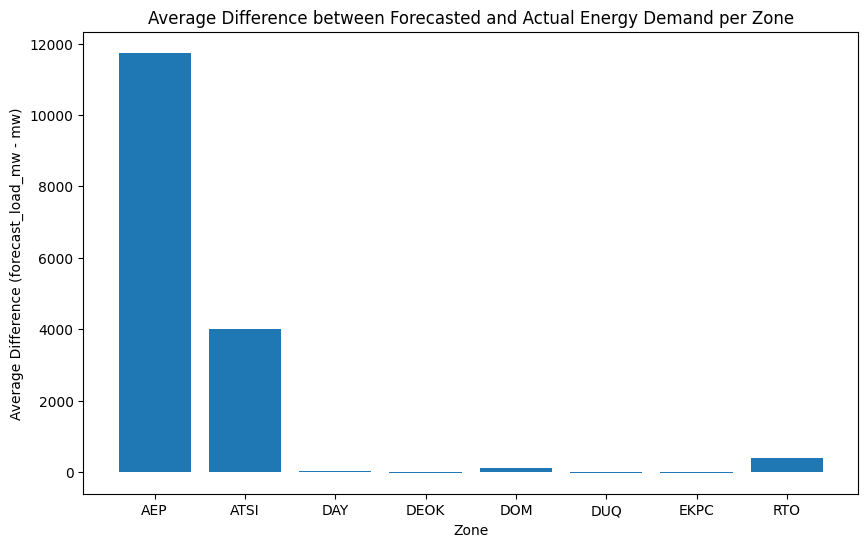

In [43]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(average_difference_by_zone['zone'], average_difference_by_zone['Difference'])
plt.xlabel("Zone")
plt.ylabel("Average Difference (forecast_load_mw - mw)")
plt.title("Average Difference between Forecasted and Actual Energy Demand per Zone")
plt.show()

This project is a simplified version of what I would like to eventually investigate, once I understand the PJM electricity grid. What I found above was that for these eight energy zones within the PJM grid, two zones experienced signficantly higher energy demand than was expected, on average. This refutes my thesis because I was expecting to see less energy demand than expected for December 2022 (markets expected that the war in Ukraine would destabalize electricity markets in the U.S. However, this did not pan out and I was looking for data that reinforced that - by showing that actual demand was lower than projected).

However, my faulty findings may be as a result of an incorrect sample data or timeframe, which I would seek to refine with further research.